![](https://images.aicrowd.com/raw_images/challenges/banner_file/1021/e6d6bda6dc16f4905124.png)

<h2><center>Starter Code for Face Recognition</center></h2>


In this baseline we will be using basic [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
 to compare the missing person image to all target faces ans generate our predictions. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [1]:
!pip install aicrowd-cli

# Make sure to re-run below code whenever you restart colab notebook
%load_ext aicrowd.magic

     |████████████████████████████████| 48 kB 2.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 214 kB 27.5 MB/s 
     |████████████████████████████████| 170 kB 32.8 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 23.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you hav

In [2]:
# Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  

%aicrowd login

Please login here: https://api.aicrowd.com/auth/u6VjR_tLbwFfCfFxSIYu4231vKRqwrwOrSIoegjGtEk
API Key valid
Gitlab access token valid
Saved details successfully!


In [3]:
# Creating a new data directory and downloading the dataset 

!rm -rf data
!mkdir data
%aicrowd ds dl -c face-recognition -o data

data.zip:   0%|          | 0.00/747M [00:00<?, ?B/s]

sample_submission.csv:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

In [4]:
# unzipping the data

!unzip data/data.zip -d /content/data > /dev/null

## Importing Libraries

In [5]:
import pandas as pd
import os
import numpy as np
import random
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
import cv2

random.seed(42)

## Reading Dataset

In [6]:
# Getting all image ids from a folder

image_ids = os.listdir("data/missing")
len(image_ids)

1000

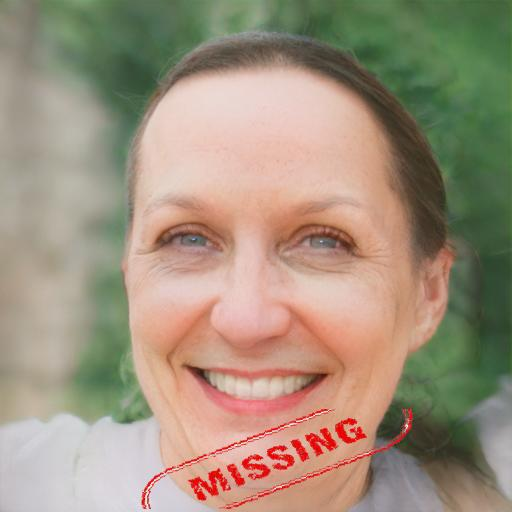

In [7]:
# Reading a sample missing person image


sample_image_id = random.choice(image_ids)
sample_missing = cv2.imread(os.path.join("data/missing", sample_image_id))
cv2_imshow(sample_missing)

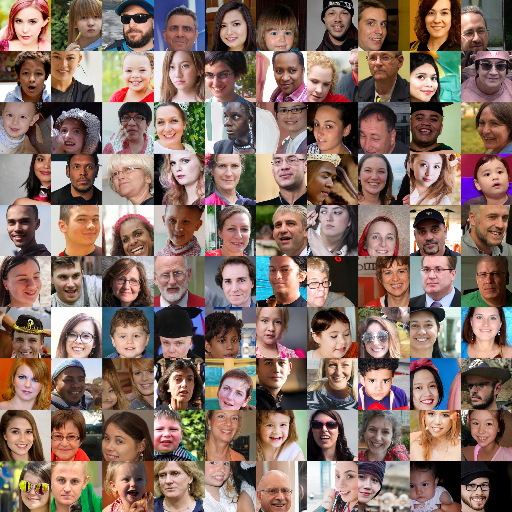

In [11]:
# Reading the corrosponding target faces

sample_target = cv2.imread(os.path.join("data/target", sample_image_id))
cv2_imshow(cv2.resize(sample_target, (512, 512)))

In [12]:
# We can also split all the faces in the target image to convert them into individual faces images

sample_target_faces = []


def get_target_face(face_no, target_image):


  # Top-Left x, y corrdinates of the specific face 
  x, y = (int(face_no[0]))*216, (int(face_no[1]))*216

  target_face = target_image[x:x+216, y:y+216]

  return target_face

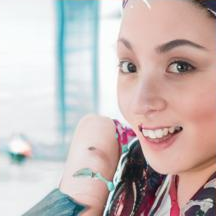

In [13]:
# Showing a sample face from a sample target image 

sample_target_face = get_target_face("96", sample_target)
cv2_imshow(sample_target_face)

## Generating Predictions

In [14]:
predictions = {"ImageID":[], "target":[]}

for img_id in tqdm(image_ids):

  missing_image = cv2.imread(os.path.join("data/missing", img_id), 0)
  missing_image = cv2.resize(missing_image, (216, 216))

  target_image = cv2.imread(os.path.join("data/target", img_id), 0)

  # Face no with minimum MSE
  min_mse_face_no = 0
  min_mse = 10000000

  for face_no in range(100):

    # Getting the specific face from the target image
    face_no = str(face_no)
    face_no = face_no.zfill(2)

    target_face = get_target_face(face_no, target_image)

    # Calculating MSE
    mse = np.square(np.subtract(missing_image, target_face)).mean()
    # print(mse)

    if mse < min_mse:
      min_mse = mse
      min_mse_face_no = face_no

  predictions['ImageID'].append(img_id.replace(".jpg", ""))
  predictions['target'].append(min_mse_face_no)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
submission = pd.DataFrame(predictions)
submission

ImageID target
0     m5awq     33
1     ieutn     10
2     kvym9     24
3     kpcn2     16
4     p8c1v     88
..      ...    ...
995   gkz66     62
996   zkz2n     17
997   9r4vy     10
998   5d4ns     44
999   abf4u     68

[1000 rows x 2 columns]

### Saving the Predictions

In [16]:
# Saving the predictions
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"), index=False)

## Submitting our Predictions

In [17]:
%aicrowd notebook submit -c face-recognition -a assets --no-verify

Using notebook: [Baseline] Face Recognition for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                   
                                                   │ Successfully submitted! │                                                   
                                                   ╰─────────────────────────╯

                                                         Important links                                                         
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/submissions/172688              │
│                  │                                                                                                            │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/submissions?my_submissions=true │
│                  │                                                                                                            │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/leaderboards                    │
│                  │                                                                                                            │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                              │
│                  │                                                                                                            │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition                                 │
└──────────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Congratulations to making your first submission in the puzzle 🎉  . Let's continue with the journey by improving the baseline & making submission! Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in discussion forum or in AIcrowd Discord sever, AIcrew will be happy to help you :)

Have a cool new idea that you want to see in the next blitz ? Let us know!